# ISLR- Python: Chapter 4 -- Lab: Classification

- [Load Datasets](#Load-Datasets)
- [4.6.1 Compute Data Correlations](#4.6.1-Compute-Data-Correlations)
- [4.6.2 Logistic Regression of Market Direction](#4.6.2-Logistic-Regression-of-Market-Direction)
- [4.6.3 Linear Discriminant Aanlysis of Market Direction](#4.6.3-Linear-Discriminant-Analysis-of-Market-Direction)
- [4.6.4 Quadratic Discriminant Analysis of Market Direction](#4.6.4-Quadratic-Discriminant-Analysis-of-Market-Direction)

In [93]:
## perform imports and set-up
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.lda import LDA

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

## Load Datasets

In [94]:
# Load data and display first rows
market_df = pd.read_csv('../../data/Smarket.csv',index_col=0)
market_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [95]:
# Show summary statistics of the data
print(market_df.shape)
market_df.describe()

(1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


## 4.6.1 Compute Data Correlations

In [96]:
# Compute correlation coeffecient matrix
corr_matrix = market_df.corr(method='pearson')
print(corr_matrix)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


#### There is no correlation between todays percentage return and the previous 5 days (lag1..lag5) days precentage returns. The only correlation is between years and volume. The plot below shows that volume increases over time.

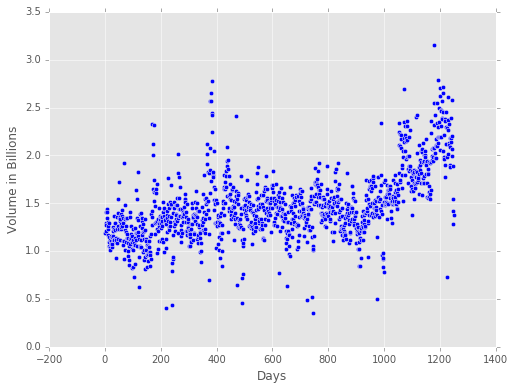

In [97]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(market_df.index, market_df.Volume.values);
ax.set_xlabel('Days');
ax.set_ylabel('Volume in Billions');

## 4.6.2 Logistic Regression of Market Direction

#### Attempt to predict market direction (up/down) using the lags and volume predictors. 

In [98]:
# Get the lag and volume column names
predictors = market_df.columns[1:7]
# Create the design matrix
X = sm.add_constant(market_df[predictors])
# Encode the response as 0,1 for down/up
Y = pd.Series([1 if el=='Up' else 0 for el in market_df.Direction.values],index=X.index)
logit = sm.Logit(Y,X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Jul 2016   Pseudo R-squ.:                0.002074
Time:                        16:47:40   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601        -0.598     0.346
Lag1          -0.0731      0.

In [99]:
# get the first 10 predictions for the training data set
training_predictions = results.predict(X)[:10]
print(training_predictions)

# convert the probabilities to 'Up' or 'Down' qualitative variables
direction_predictions = ['Up' if el > 0.5 else 'Down' for el in training_predictions]
direction_predictions[:10]

[ 0.50708413  0.48146788  0.48113883  0.51522236  0.51078116  0.50695646
  0.49265087  0.50922916  0.51761353  0.48883778]


['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down']

In [100]:
# we can now build a confusion matrix to asses the correct and incorrect predictions. 
table = results.pred_table(threshold=0.5)
confusion_df = pd.DataFrame(table,['Down','Up'],['Down','Up'])
print(confusion_df)
print('')
print('The model made', 
      (confusion_df.Down[0]+confusion_df.Up[1])/confusion_df.sum().sum(), '% correct predictions on the TRAINING SET.')

      Down   Up
Down   145  457
Up     141  507

The model made 0.5216 % correct predictions on the TRAINING SET.


#### Split the data into a training and test set and recompute the model's accuracy on the test set.

In [101]:
# Split the data into training and test dataframes
training_df = market_df[market_df.Year<2005]
test_df = market_df[market_df.Year==2005]

# Compute Training Coeffecients #
#################################
# Use the lags and volume as predictors for the years 2001 to 2004 (training set)
predictors = training_df.columns[1:7]
# Create the design matrix for the training_df
X_train = sm.add_constant(training_df[predictors])

# Encode the response as 0,1 for down/up for response variable of the training set
Y_train = pd.Series([1 if el=='Up' else 0 for el in training_df.Direction.values],index=X_train.index)
# fit the model and return the training results
train_logit = sm.Logit(Y_train,X_train)
train_results = train_logit.fit()

# Make Predictions on Test Set #
################################
# make a design matrix for the testing data
X_test = sm.add_constant(test_df[predictors])

# Encode the response as 0,1 for down/up for response variable of the test set
Y_test = pd.Series([1 if el=='Up' else 0 for el in test_df.Direction.values],index=X_test.index)

# now use the training coeffecients to make predictions about the returns of the testing set (year=2005)
test_predictions = train_results.predict(X_test)

# Convert the probability predictions to a binary prediction
prediction_array = np.array(test_predictions > 0.5, dtype=float)

# print the percentage of correct predictions
print('')
print(' The model made', np.mean(prediction_array == Y_test),'% correct predictions on the TEST SET.')

# Compute Test Confusion Matrix #
#################################
# Stats models doesn't have an option for a confusion matrix for test sets-- we build one by hand using
# hsitogram2d
table = np.histogram2d(prediction_array, Y_test, bins=2)[0]
pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up'])

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4

 The model made 0.480158730159 % correct predictions on the TEST SET.


,Down,Up
Down,77,97
Up,34,44


#### Fit a model using only the two lowest p-value lag variables (lag1 and lag2).

Adding non-significant variables to our model reduces the performance on the training set because it causes an increase in the model variance without a corresponding decrease in the bias. We now fit a reduced model with only the lag1 and lag2 variables since these two had the lowest p-values in the full model.

In [102]:
# Compute Reduced Training Model Coeffecients #
###############################################
# use lag 1 and lag 2 as the predictors
predictors = ['Lag1','Lag2']
X_train_red = sm.add_constant(training_df[predictors])
# Encode the response as 0,1 for down/up for response variable of the training set
Y_train_red = pd.Series([1 if el=='Up' else 0 for el in training_df.Direction.values],index=X_train_red.index)
# fit the model and return the training results
train_logit_red = sm.Logit(Y_train_red,X_train_red)
train_results_red = train_logit_red.fit()

# Make Predictions on Test Set #
################################
# make design matrix for testing data
X_test_red = sm.add_constant(test_df[predictors])
# Encode the response as 0,1 for down/up for response variable of the test set
Y_test_red = pd.Series([1 if el=='Up' else 0 for el in test_df.Direction.values],index=X_test_red.index)

# now use the training coeffecients to make predictions about the returns of the testing set (year=2005)
test_predictions_red = train_results_red.predict(X_test_red)

# Convert the probability predictions to a binary prediction
prediction_array_red = np.array(test_predictions_red > 0.5, dtype=float)

# print the percentage of correct predictions
print('')
print(' The model made', np.mean(prediction_array_red == Y_test_red),
      '% correct predictions on the TEST SET using', predictors, 'predictors.')
print('')

# Compute Test Confusion Matrix #
#################################
# Stats models doesn't have an option for a confusion matrix for test sets-- we build one by hand using
# hsitogram2d
table = np.histogram2d(prediction_array_red, Y_test_red, bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('On days where the previous day was \'Up\' the probability the market will be \'Up\' is',
      table[1][1]/(table[1][0]+table[1][1]))

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3

 The model made 0.559523809524 % correct predictions on the TEST SET using ['Lag1', 'Lag2'] predictors.

      Down   Up
Down    35   35
Up      76  106

On days where the previous day was 'Up' the probability the market will be 'Up' is 0.582417582418


## 4.6.3 Linear Discriminant Analysis of Market Direction

Predict the market direction using Lag1 and Lag2 as predictors using scikit learn LDA module.

In [103]:
# use lag 1 and lag 2 as the predictors
predictors = ['Lag1','Lag2']

X_train = training_df[predictors].values
# Encode the response as 0,1 for down/up for response variable of the training set
Y_train = np.array([1 if el=='Up' else 0 for el in training_df.Direction.values])

# Create Classifier
lda_clf = LDA(solver='lsqr',store_covariance=True)
# Fit model
lda_clf.fit(X_train,Y_train)

print('Class Priors =', lda_clf.priors_)
print('Class Means =', lda_clf.means_)
print('Coeffecients =', lda_clf.coef_)

Class Priors = [ 0.49198397  0.50801603]
Class Means = [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Coeffecients = [[-0.05555211 -0.04443425]]


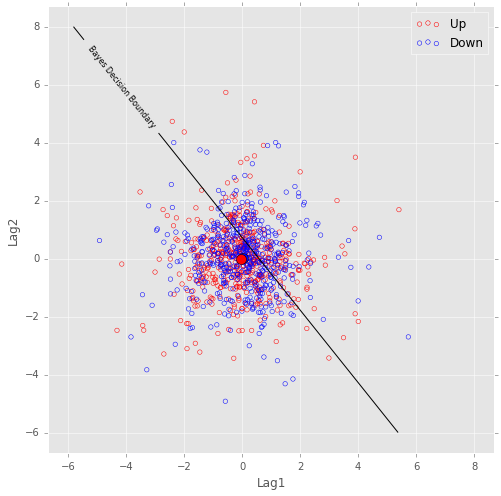

In [104]:
# Make a scatter plot of the lag predictors and show the Bayes decision boundary
fig, ax = plt.subplots(figsize=(8,8))
# Plot the training lags color coded by market direction
ax.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], facecolors='none', edgecolors='r', label='Up')
ax.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1], facecolors='none', edgecolors='b', label='Down')

# Construct a meshgrid to calulate Bayes Boundary
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# Use predict_proba to calculate Probability at each x1,x2 pair
Z = lda_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Plot the 0.5 contour
cp = ax.contour(xx, yy, Z, [0.5], linewidths=1., colors='k',clabel='Bayes Decision Boundary');
plt.clabel(cp, inline=True, fmt='Bayes Decision Boundary',fontsize=8)

# Plot the means of lag predictors for 'down' and 'up' responses, notice there is essentially no separation
ax.plot(lda_clf.means_[0][0], lda_clf.means_[0][1], 'o', color='blue', markersize=10);
ax.plot(lda_clf.means_[1][0], lda_clf.means_[1][1], 'o', color='red', markersize=10);

ax.set_xlabel('Lag1')
ax.set_ylabel('Lag2')
ax.legend(loc='best');

In [109]:
# Get the models predictions for market directions on the test set
Y_predict = lda_clf.predict(test_df[predictors].values)
# We have already computed the actual market directions Y_test_red above

# Compute Test Confusion Matrix #
#################################
table = np.histogram2d(Y_predict, Y_test_red , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
# same results as using the logistic function

      Down   Up
Down    35   35
Up      76  106


## 4.6.4 Quadratic Discriminant Analysis of Market Direction